# House characteristics and sale prices

We are going to analyze and visualise the sale price of houses that were sold between 2006 and 2010 in Ames, Iowa.

Professor Dean DeCock collected the data — he described the data collection process in a paper he published in the Journal of Statistics Education. You can find the documentation for the dataset at this [link](https://s3.amazonaws.com/dq-content/307/data_description.txt).

You can download the original dataset from [here](https://s3.amazonaws.com/dq-content/305/AmesHousing.txt)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


houses = pd.read_csv("Housing.csv")

In [6]:
print(houses.head())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [7]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

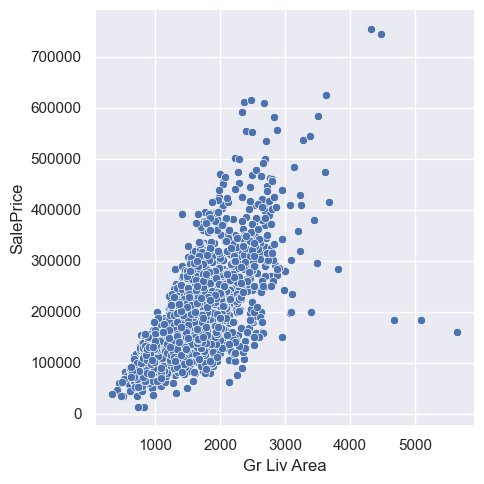

In [9]:
#Let's see the relation between Above grade (ground) living area (sq feet) and sale price:
sns.set_theme()
sns.relplot(data=houses, x='Gr Liv Area', y='SalePrice')
plt.show()


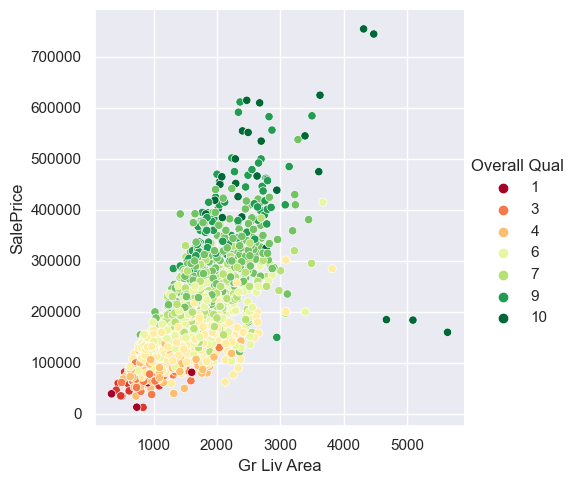

In [11]:
#Lets add the Overal quality of used material as a third factor:
sns.relplot(data=houses, x='Gr Liv Area', y='SalePrice', hue = 'Overall Qual', palette = 'RdYlGn')
plt.show()

### findings:
* Houses with smaller living areas aboveground typically have a lower overall quality.
* Very rarely, we see high-quality houses with a high living area aboveground (over 4,000 square feet) sold at relatively low prices (under 200,000 USD).

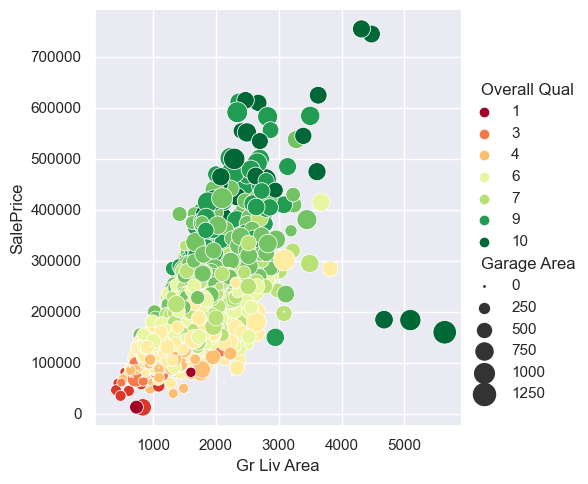

In [12]:
#Lets find the impact of Garage area on prices
sns.relplot(data=houses, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300))

### findings:
* Houses with an overall quality of nine or ten typically have garage areas greater than 500 square feet, living areas aboveground greater than 2,000 feet, and sell for more than 400,000 USD.

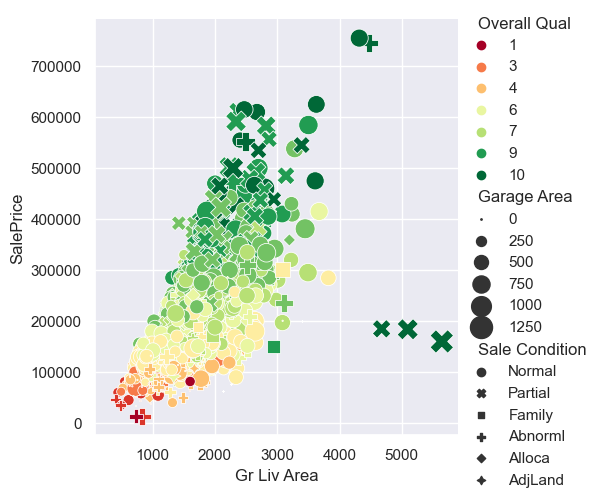

In [16]:
#there are some large houses(more than 4000 sq feet) that were sold at a low price(around 200,000 USD). 
#Lets examine if they were sold under certain conditons:
sns.relplot(data=houses, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300), style = 'Sale Condition')
plt.show()

### findings:
* some large houses(whose area were more than 4000 sq feet), were sold at a low price(around 200,000 USD). They were sold based on a "Partial" condition.

In [20]:
#Lets examine the impact of year built:
houses["Year Built"].unique()

array([1960, 1961, 1958, 1968, 1997, 1998, 2001, 1992, 1995, 1999, 1993,
       1990, 1985, 2003, 1988, 2010, 1951, 1978, 1977, 1974, 2000, 1970,
       1971, 1975, 2009, 2007, 2005, 2004, 2002, 2006, 1996, 1994, 2008,
       1980, 1979, 1984, 1920, 1965, 1967, 1963, 1962, 1976, 1972, 1966,
       1959, 1964, 1950, 1952, 1949, 1940, 1954, 1955, 1957, 1956, 1953,
       1948, 1900, 1910, 1927, 1915, 1945, 1929, 1938, 1923, 1928, 1890,
       1885, 1922, 1925, 1939, 1942, 1936, 1930, 1921, 1912, 1917, 1907,
       1875, 1969, 1947, 1946, 1987, 1941, 1924, 1914, 1931, 1919, 1989,
       1896, 1973, 1991, 1981, 1986, 1916, 1926, 1935, 1892, 1898, 1880,
       1882, 1937, 1902, 1934, 1982, 1983, 1932, 1918, 1904, 1905, 1872,
       1893, 1906, 1908, 1911, 1895, 1879, 1901, 1913])

<AxesSubplot:ylabel='Frequency'>

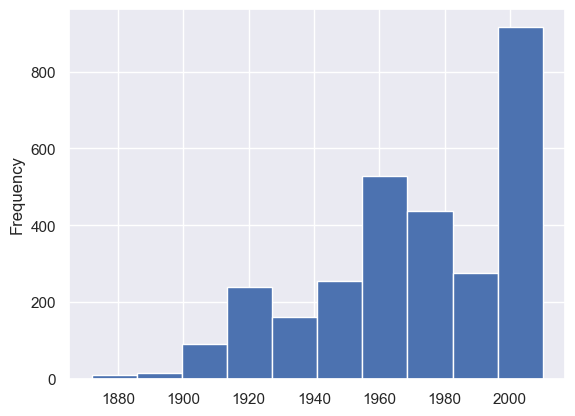

In [21]:
houses["Year Built"].plot.hist(bins = 10)

It seems we can categorize the built year of houses into two main groups: before 2000 and after 2000

In [26]:
houses["Year Built Category"] = houses["Year Built"].apply(lambda x: "2000 or newer" if x >= 2000 else "1999 or older")

In [27]:
houses["Year Built Category"].value_counts(normalize = True)*100

1999 or older    73.276451
2000 or newer    26.723549
Name: Year Built Category, dtype: float64

### finding:
* now that we examined the built year more precisely, we found that approximately %26 of houses were built after 2000 and the rest of them (around %74) were built before 2000.

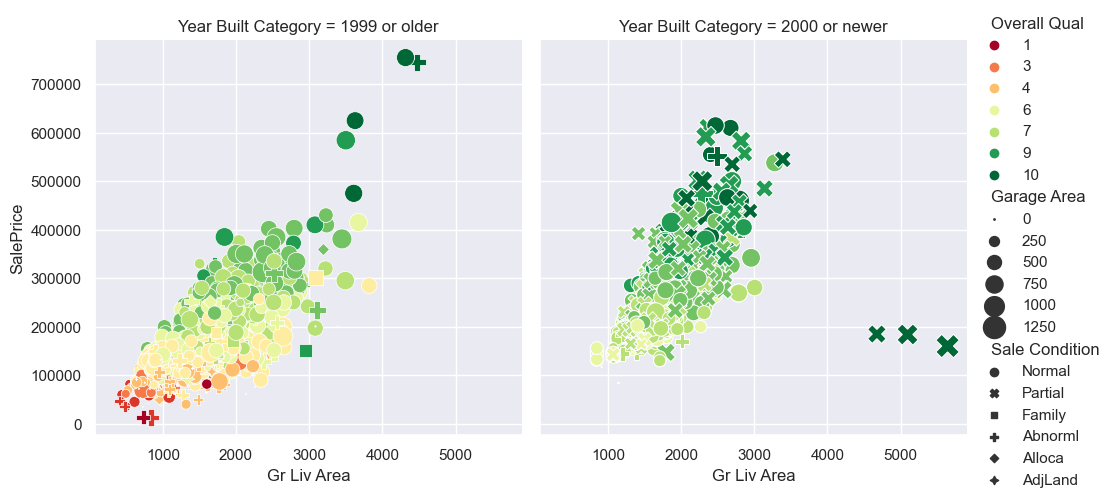

In [30]:
#Lets visualize the impact of year built category on the sale prices:

sns.relplot(data=houses, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300), style = 'Sale Condition', col = 'Year Built Category')
plt.show()

### findings:
* Most houses built in 2000 or later have a living area aboveground between 1,000 and 3,000 square feet and sell for more than 100,000 USD.
* Most of the houses with an overall quality rating of four or less were built in 1999 or earlier, have low garage area and six rooms or less.